In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

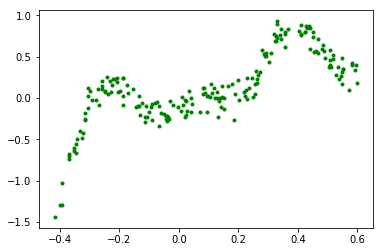

In [6]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = torch.FloatTensor(x.reshape(-1,1))
yy = torch.FloatTensor(y.reshape(-1,1))
plt.scatter(x, y, marker='.', color='g')

In [7]:
## defining the model
class ProbRegression(nn.Module):
    
    def __init__(self, n_hidden=2):
        super().__init__()
        self.fcp1 = nn.Linear(1, n_hidden)
        self.fcr1 = nn.Linear(1, n_hidden)
#         self.fcr2 = nn.Linear(n_hidden, 1)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self,x):
        p = self.fcp1(x)
        p = self.softmax(p)
        r = self.fcr1(x)

        ########## Use any of the following methods###########
        
        ## method 1 ##
        indx = torch.argmax(p, dim=1)
        out = r[torch.arange(x.shape[0]), indx].reshape(-1,1)

        ## method 2 ##
#         out = (p*r).sum(dim=1).reshape(-1,1)
        
        ## method 3 ##
#         out = self.fcr2(p*r)
    
        return out
    
model = ProbRegression(n_hidden=20)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.MSELoss()

_______________________
epoch 0
Loss tensor(0.3649)

_______________________
epoch 100
Loss tensor(0.1615)

_______________________
epoch 200
Loss tensor(0.1008)

_______________________
epoch 300
Loss tensor(0.0815)

_______________________
epoch 400
Loss tensor(0.0757)

_______________________
epoch 500
Loss tensor(0.0734)

_______________________
epoch 600
Loss tensor(0.0722)

_______________________
epoch 700
Loss tensor(0.0715)

_______________________
epoch 800
Loss tensor(0.0711)

_______________________
epoch 900
Loss tensor(0.0709)

_______________________
epoch 1000
Loss tensor(0.0707)

_______________________
epoch 1100
Loss tensor(0.0706)

_______________________
epoch 1200
Loss tensor(0.0705)

_______________________
epoch 1300
Loss tensor(0.0704)

_______________________
epoch 1400
Loss tensor(0.0703)

_______________________
epoch 1500
Loss tensor(0.0703)

_______________________
epoch 1600
Loss tensor(0.0702)

_______________________
epoch 1700
Loss tensor(0.0701)

____

TclError: invalid command name "pyimage30"

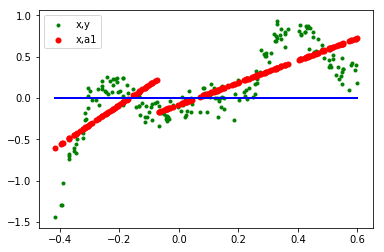

In [8]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

EPOCHS = 10000
for step in range(EPOCHS):

    yout = model(xx)
#     print(yout)
    loss = criterion(yout, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss.data)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.data.numpy().reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

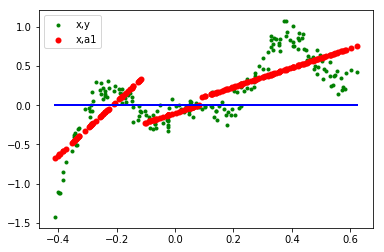

In [5]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.data.numpy().reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.legend()

In [ ]:
layer1prob.output